<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

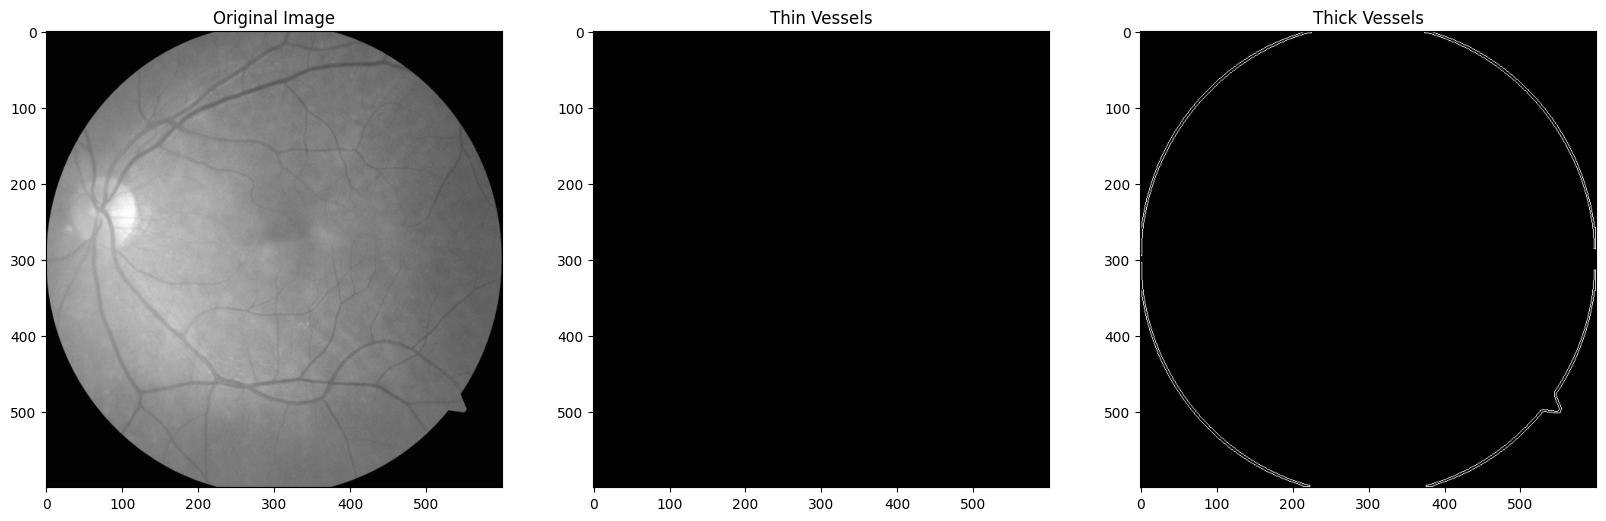

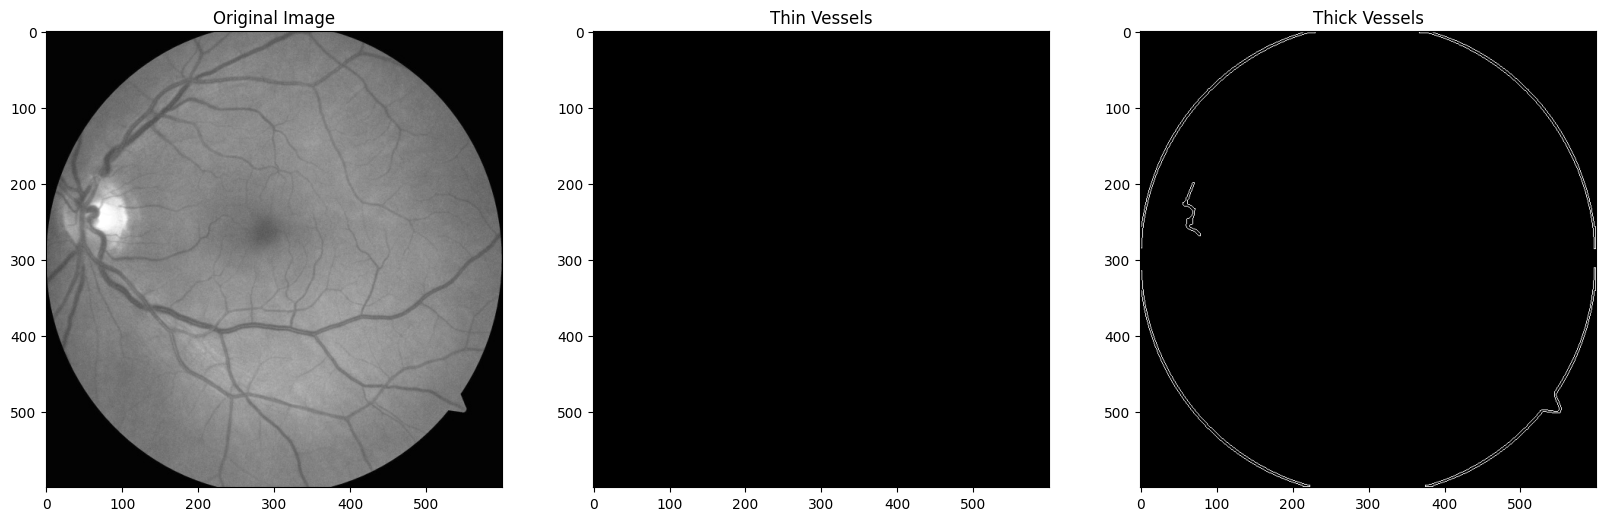

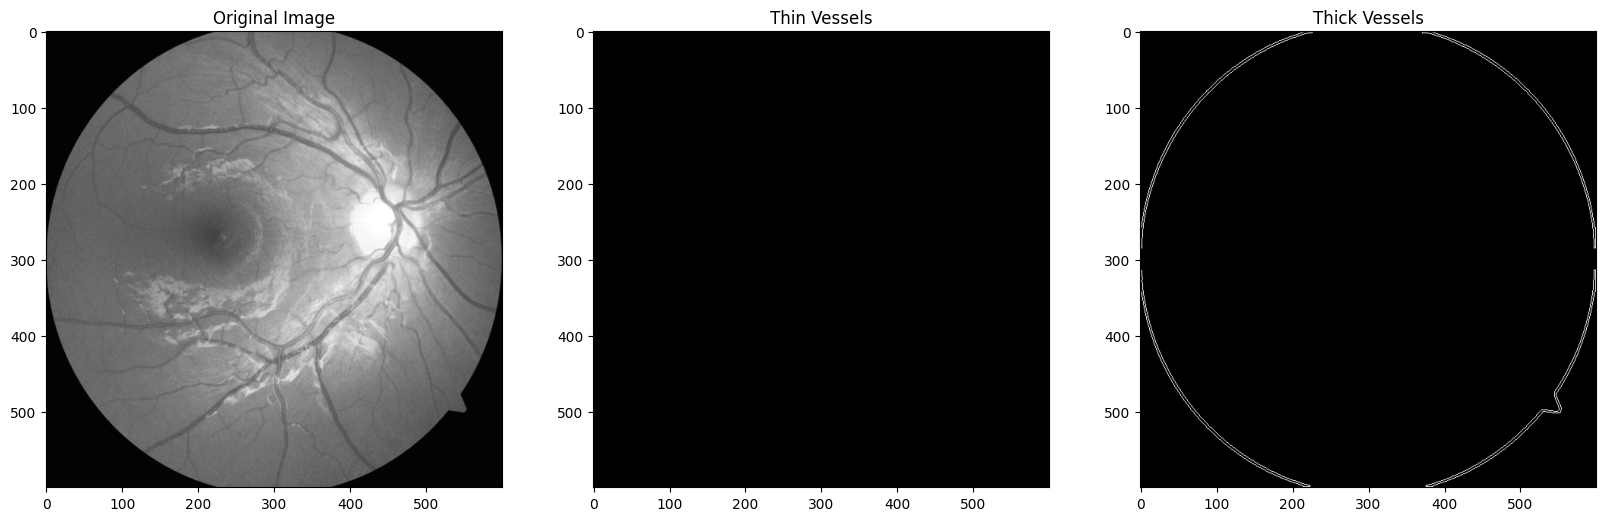

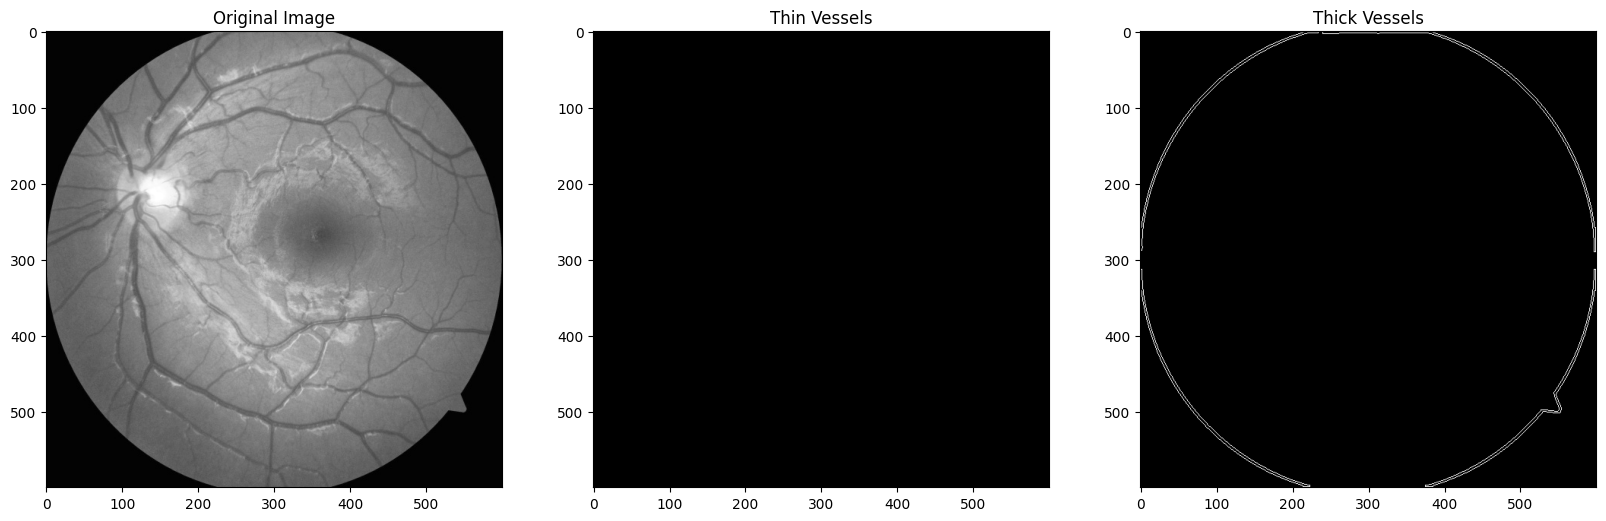

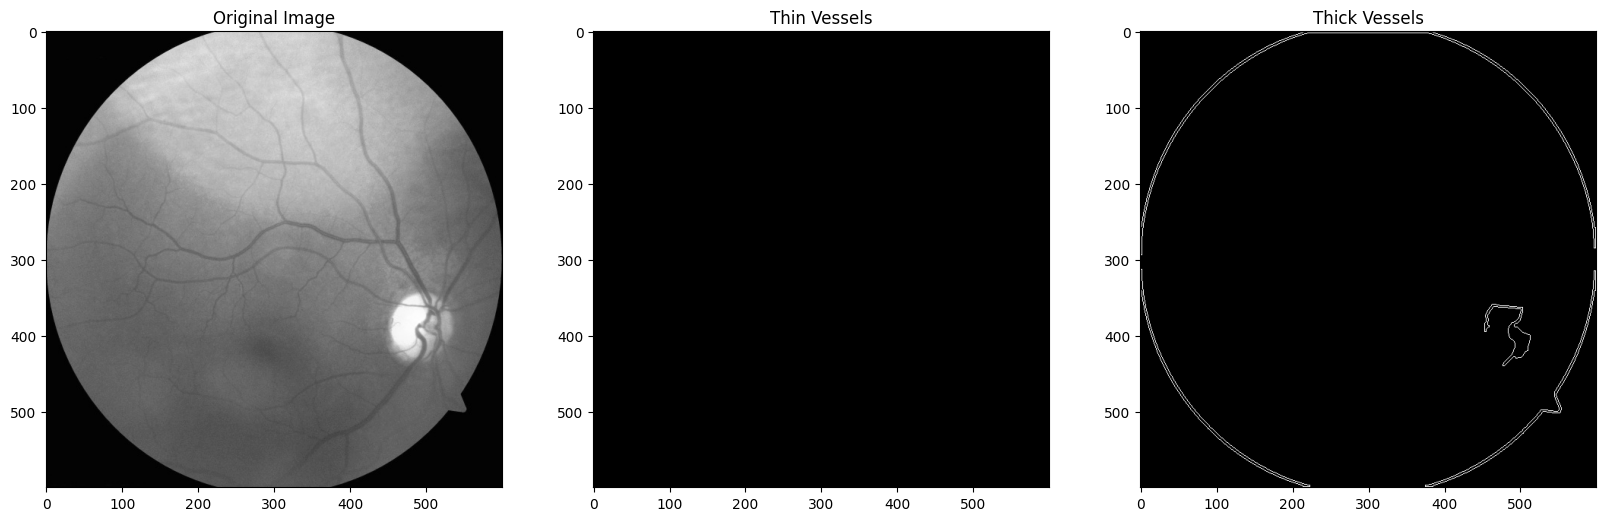

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

# Define a function to process the images
def process_images(directory):
    # Iterate over each subdirectory in the directory
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        # Iterate over each image in the subdirectory
        for filename in os.listdir(subdir_path):
            # Load the image
            img = cv2.imread(os.path.join(subdir_path, filename), cv2.IMREAD_GRAYSCALE)

            # Apply a Gaussian blur to the image
            blurred = cv2.GaussianBlur(img, (5, 5), 0)

            # Perform edge detection
            edges = cv2.Canny(blurred, 50, 150)

            # Perform a dilation and erosion to close gaps in between object edges
            dilated = cv2.dilate(edges, None, iterations=2)
            eroded = cv2.erode(dilated, None, iterations=1)

            # Create a mask for the vessels
            mask = eroded > 0.5

            # Convert the mask to an 8-bit single-channel image
            mask = mask.astype(np.uint8)

            # Separate the vessels into thin and thick based on their area
            thin_vessels = np.zeros_like(img)
            thick_vessels = np.zeros_like(img)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                # If the area of the connected component is less than a threshold, it is a thin vessel
                if cv2.contourArea(contour) < 50:  # Lower threshold
                    cv2.drawContours(thin_vessels, [contour], -1, (255), 1)
                else:
                    cv2.drawContours(thick_vessels, [contour], -1, (255), 1)

            # Visualize the results
            plt.figure(figsize=(20, 10))
            plt.subplot(1, 3, 1)
            plt.imshow(img, cmap='gray')
            plt.title('Original Image')
            plt.subplot(1, 3, 2)
            plt.imshow(thin_vessels, cmap='gray')
            plt.title('Thin Vessels')
            plt.subplot(1, 3, 3)
            plt.imshow(thick_vessels, cmap='gray')
            plt.title('Thick Vessels')
            plt.show()

# Process the images in the train and test directories
process_images(train_dir)
process_images(test_dir)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab.patches import cv2_imshow

# Load the images
image1_path = '/content/output_10.jpg'
image2_path = '/content/drive/MyDrive/A/Train/0/10.jpg'

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Ensure both images have the same dimensions
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Multiply the images
result = cv2.multiply(image1, image2)

# Save the result
cv2.imwrite('/content/multiplied_result.jpg', result)

# Display the result
cv2_imshow(result)


Image Path: /content/drive/MyDrive/DR_50/Valid/0/10.jpg
Image Loaded Successfully!


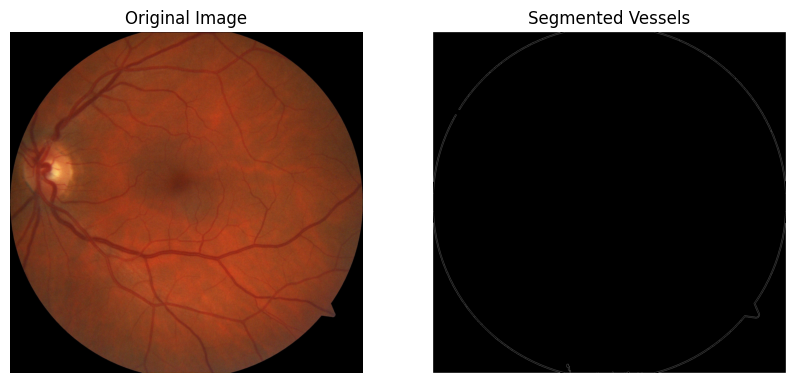

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image_path = '/content/drive/MyDrive/DR_50/Valid/0/10.jpg'
print("Image Path:", image_path)

image = cv2.imread(image_path)
if image is None:
    print("Error: Unable to read the image file.")
else:
    print("Image Loaded Successfully!")


# Function to perform vessel segmentation
def segment_vessels(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    threshold = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Perform morphological operations to enhance vessels
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw vessels on a black canvas
    vessels = np.zeros_like(gray)
    cv2.drawContours(vessels, contours, -1, (255), 1)

    return vessels

# Segment vessels
vessels = segment_vessels(image)

# Visualize the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(vessels, cmap='gray')
plt.title('Segmented Vessels')
plt.axis('off')

plt.show()


Image saved successfully at: /content/drive/MyDrive/Segment/gabor_result.jpg
Image saved successfully at: /content/drive/MyDrive/Segment/log_result.jpg
Image saved successfully at: /content/drive/MyDrive/Segment/sobel_result.jpg
Image saved successfully at: /content/drive/MyDrive/Segment/canny_result.jpg


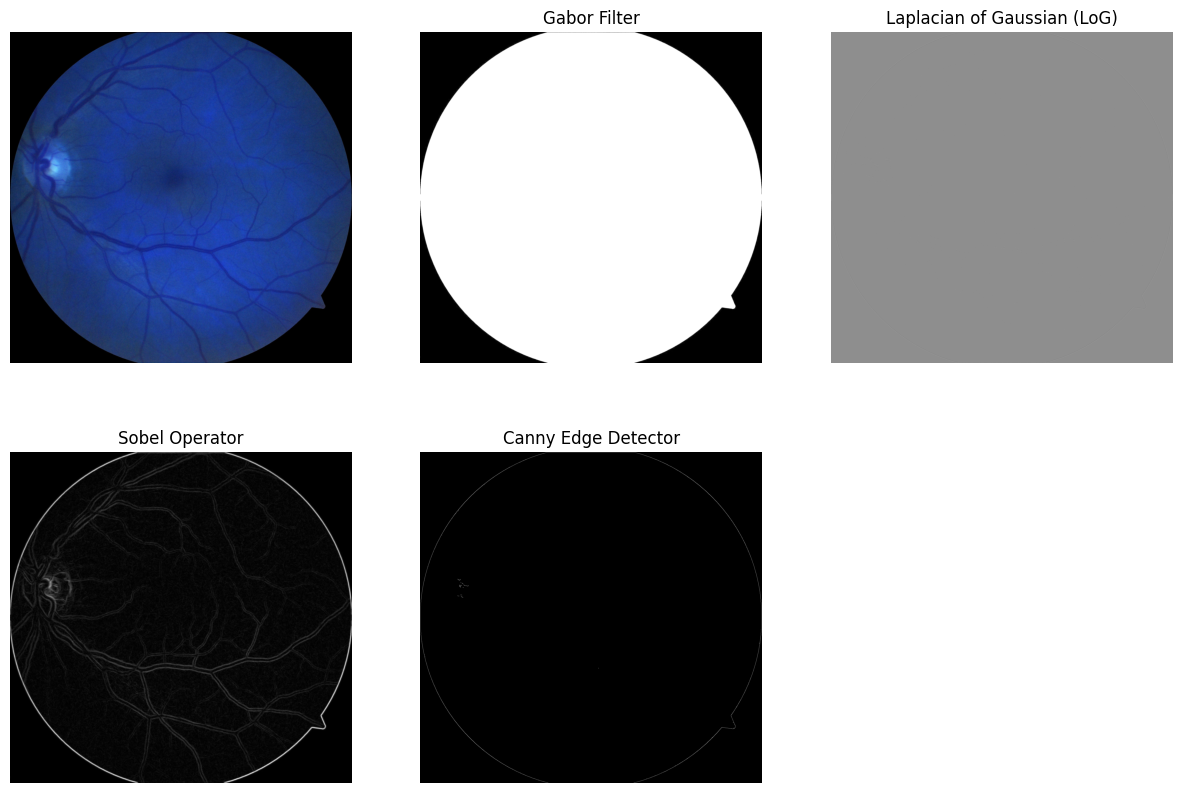

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directory path to save the images
output_directory = '/content/drive/MyDrive/Segment/'

# Function to save the processed image
def save_image(output_image, filename):
    # Concatenate the output directory and filename
    output_path = os.path.join(output_directory, filename)

    # Save the output image
    cv2.imwrite(output_path, output_image)

    print(f"Image saved successfully at: {output_path}")

# Load an example image
image_path = '/content/drive/MyDrive/DR_50/Valid/0/10.jpg'
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gabor filter
gabor_kernel = cv2.getGaborKernel((3, 3), 8.0, np.pi/2, 10.0, 0.5, 0, ktype=cv2.CV_32F)
gabor_result = cv2.filter2D(gray, cv2.CV_8UC3, gabor_kernel)
save_image(gabor_result, 'gabor_result.jpg')  # Save the Gabor filter result

# Apply Laplacian of Gaussian (LoG)
log_result = cv2.Laplacian(gray, cv2.CV_64F)
save_image(log_result, 'log_result.jpg')  # Save the LoG result

# Apply Sobel operator
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=31)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=31)
sobel_result = np.sqrt(sobel_x**2 + sobel_y**2)
save_image(sobel_result, 'sobel_result.jpg')  # Save the Sobel operator result

# Apply Canny edge detector
canny_result = cv2.Canny(gray, 50, 100)
save_image(canny_result, 'canny_result.jpg')  # Save the Canny edge detector result

# Display the image
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels

plt.subplot(2, 3, 2)
plt.imshow(gabor_result, cmap='gray')
plt.title('Gabor Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(log_result, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Operator')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(canny_result, cmap='gray')
plt.title('Canny Edge Detector')
plt.axis('off')

plt.show()



In [34]:
help(cv2.Laplacian)

Help on built-in function Laplacian:

Laplacian(...)
    Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the Laplacian of an image.
    .   
    .   The function calculates the Laplacian of the source image by adding up the second x and y
    .   derivatives calculated using the Sobel operator:
    .   
    .   \f[\texttt{dst} =  \Delta \texttt{src} =  \frac{\partial^2 \texttt{src}}{\partial x^2} +  \frac{\partial^2 \texttt{src}}{\partial y^2}\f]
    .   
    .   This is done when `ksize > 1`. When `ksize == 1`, the Laplacian is computed by filtering the image
    .   with the following \f$3 \times 3\f$ aperture:
    .   
    .   \f[\vecthreethree {0}{1}{0}{1}{-4}{1}{0}{1}{0}\f]
    .   
    .   @param src Source image.
    .   @param dst Destination image of the same size and the same number of channels as src .
    .   @param ddepth Desired depth of the destination image, see @ref filter_depths "combinations".
    .   @param ksi

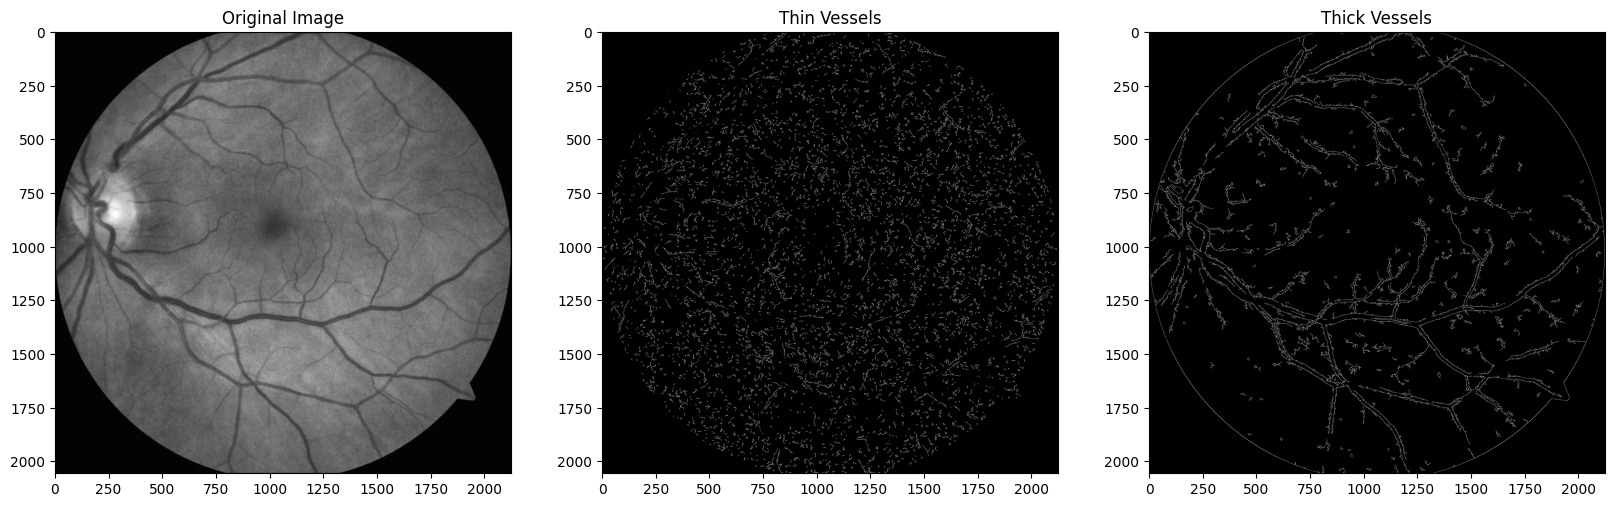

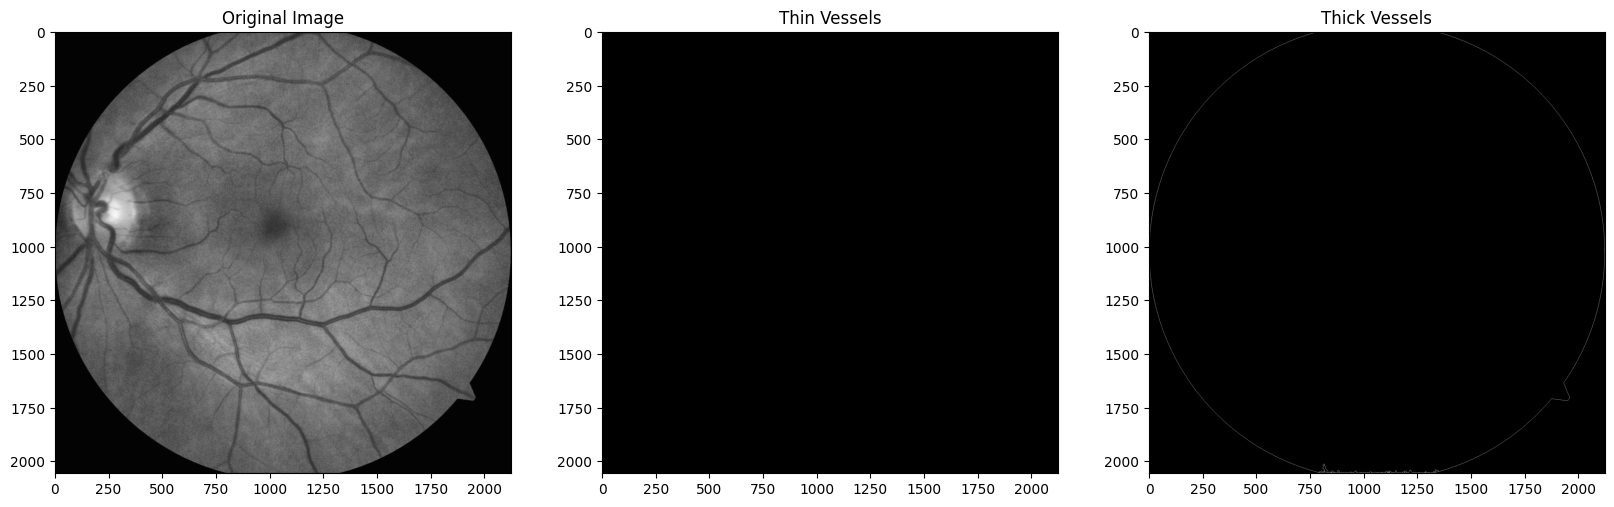

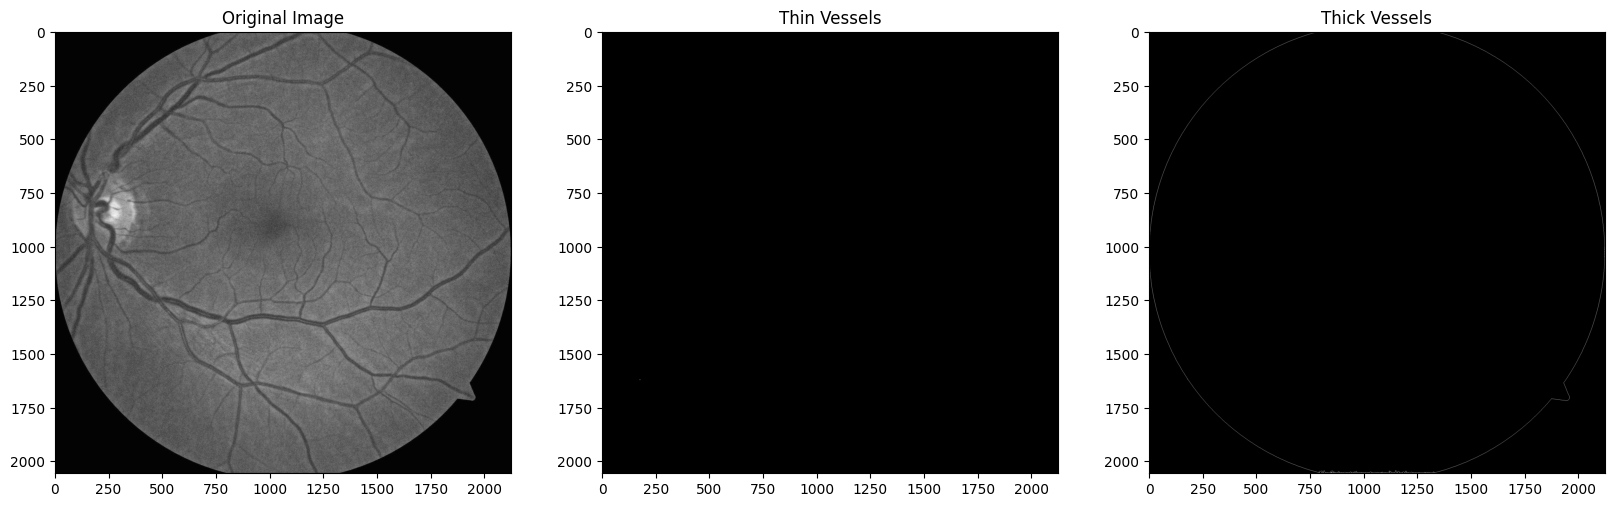

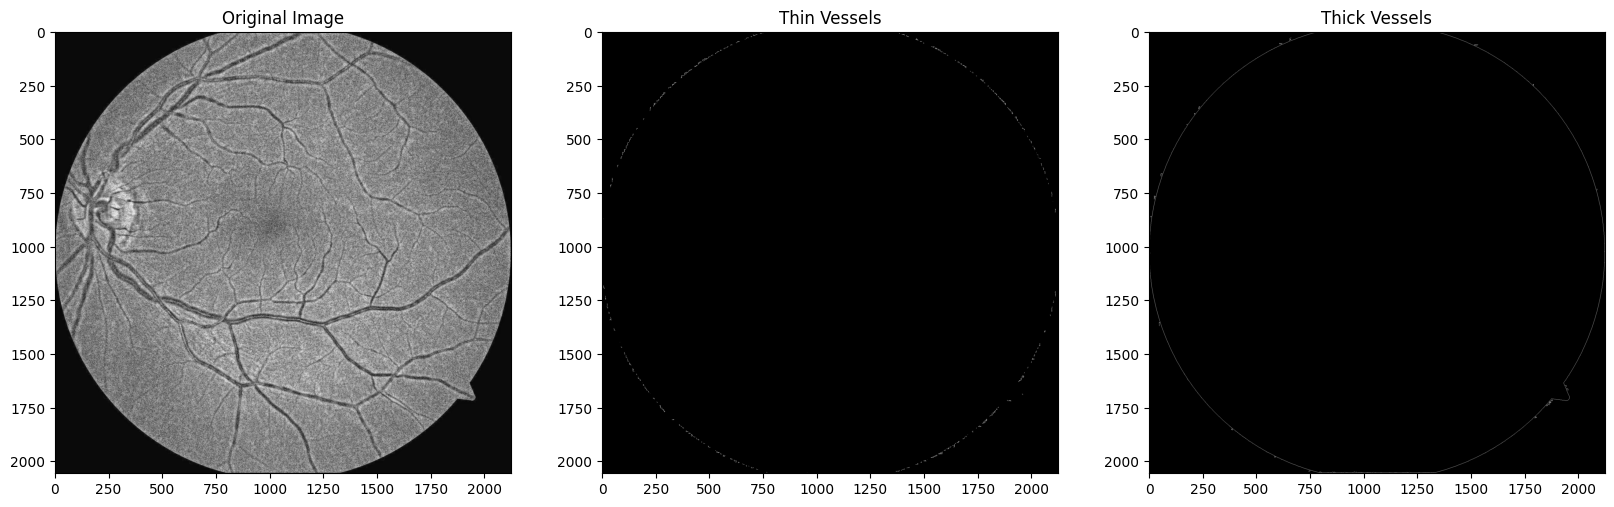

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    '/content/output.jpg',
    '/content/output_CLAHE.jpg',
    '/content/output_CLAHE1.jpg',
    '/content/output_CLAHE2.jpg',
]

# Define a function to process the images
def process_images(image_paths):
    # Iterate over each image path
    for image_path in image_paths:
        # Load the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply a Gaussian blur to the image
        blurred = cv2.GaussianBlur(img, (5, 5), 0)

        # Perform edge detection
        edges = cv2.Canny(blurred, 20, 40)

        # Perform a dilation and erosion to close gaps in between object edges
        dilated = cv2.dilate(edges, None, iterations=1)
        eroded = cv2.erode(dilated, None, iterations=1)

        # Create a mask for the vessels
        mask = eroded > 0.8

        # Convert the mask to an 8-bit single-channel image
        mask = mask.astype(np.uint8)

        # Separate the vessels into thin and thick based on their area
        thin_vessels = np.zeros_like(img)
        thick_vessels = np.zeros_like(img)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            # If the area of the connected component is less than a threshold, it is a thin vessel
            if cv2.contourArea(contour) < 50:  # Lower threshold
                cv2.drawContours(thin_vessels, [contour], -1, (255), 1)
            else:
                cv2.drawContours(thick_vessels, [contour], -1, (255), 1)

        # Visualize the results
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')
        plt.subplot(1, 3, 2)
        plt.imshow(thin_vessels, cmap='gray')
        plt.title('Thin Vessels')
        plt.subplot(1, 3, 3)
        plt.imshow(thick_vessels, cmap='gray')
        plt.title('Thick Vessels')
        plt.show()

# Process the images
process_images(image_paths)


In [38]:
import cv2
import numpy as np

# Define the image path
image_path = '/content/drive/MyDrive/A/Train/0/10.jpg'  # Replace with your actual image file path

# Load the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    print(f"Could not load image at {image_path}")
else:
    # Apply contrast stretching
    minI = np.min(img)
    maxI = np.max(img)
    img = (img - minI) / (maxI - minI) * 255

    # Apply a median blur to reduce noise
    img = cv2.medianBlur(img.astype(np.uint8), 5)

    # Use Otsu's thresholding method to separate the vessels from the background
    _, vessels = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform a morphological operation (opening) to remove small objects
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    vessels = cv2.morphologyEx(vessels, cv2.MORPH_OPEN, kernel)

    # Invert the image to get the desired output
    vessels = cv2.bitwise_not(vessels)

    # Save the output image
    output_image_path = 'output.jpg'  # Replace with your desired output image file path
    cv2.imwrite(output_image_path, vessels)

    print(f"The output image was saved successfully at {output_image_path}")


The output image was saved successfully at output.jpg


In [52]:
import cv2
import numpy as np

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/A/Train/0/1.jpg',
    '/content/drive/MyDrive/A/Train/0/10.jpg',
    '/content/drive/MyDrive/A/Train/0/100.jpg',
    '/content/drive/MyDrive/A/Train/0/101.jpg',
    '/content/drive/MyDrive/A/Train/0/102.jpg'
]

# Define a function to get the Otsu's threshold
def get_otsu_threshold(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded properly
    if img is None:
        print(f"Could not load image at {image_path}")
        return None

    # Apply contrast stretching
    minI = np.min(img)
    maxI = np.max(img)
    img = (img - minI) / (maxI - minI) * 255

    # Apply a median blur to reduce noise
    img = cv2.medianBlur(img.astype(np.uint8), 5)

    # Use Otsu's thresholding method to separate the vessels from the background
    otsu_threshold, _ = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return otsu_threshold

# Get the Otsu's threshold for each image
for image_path in image_paths:
    otsu_threshold = get_otsu_threshold(image_path)
    if otsu_threshold is not None:
        print(f"The Otsu's threshold for {image_path} is {otsu_threshold}.")


The Otsu's threshold for /content/drive/MyDrive/A/Train/0/1.jpg is 69.0.
The Otsu's threshold for /content/drive/MyDrive/A/Train/0/10.jpg is 68.0.
The Otsu's threshold for /content/drive/MyDrive/A/Train/0/100.jpg is 66.0.
The Otsu's threshold for /content/drive/MyDrive/A/Train/0/101.jpg is 67.0.
The Otsu's threshold for /content/drive/MyDrive/A/Train/0/102.jpg is 67.0.


The output image was saved successfully.


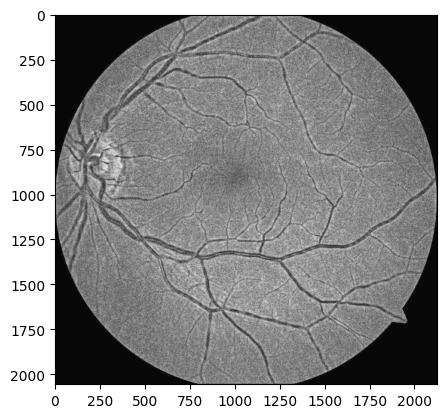

In [77]:
import cv2
import numpy as np

# Define the image path
image_path = '/content/drive/MyDrive/DR_50/Valid/0/10.jpg'  # Replace with your actual image file path

# Load the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    print(f"Could not load image at {image_path}")
else:
    # Apply contrast stretching
    minI = np.min(img)
    maxI = np.max(img)
    img = (img - minI) / (maxI - minI) * 255

    # Apply a median blur to reduce noise
    img = cv2.medianBlur(img.astype(np.uint8), 1)

    # Apply adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(128,128))
    img = clahe.apply(img)

    # Save the output image
    cv2.imwrite('output_CLAHE2.jpg', img)
    plt.imshow(img, cmap='gray')

    print("The output image was saved successfully.")


In [67]:
help(cv2.medianBlur)

Help on built-in function medianBlur:

medianBlur(...)
    medianBlur(src, ksize[, dst]) -> dst
    .   @brief Blurs an image using the median filter.
    .   
    .   The function smoothes an image using the median filter with the \f$\texttt{ksize} \times
    .   \texttt{ksize}\f$ aperture. Each channel of a multi-channel image is processed independently.
    .   In-place operation is supported.
    .   
    .   @note The median filter uses #BORDER_REPLICATE internally to cope with border pixels, see #BorderTypes
    .   
    .   @param src input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be
    .   CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
    .   @param dst destination array of the same size and type as src.
    .   @param ksize aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
    .   @sa  bilateralFilter, blur, boxFilter, GaussianBlur



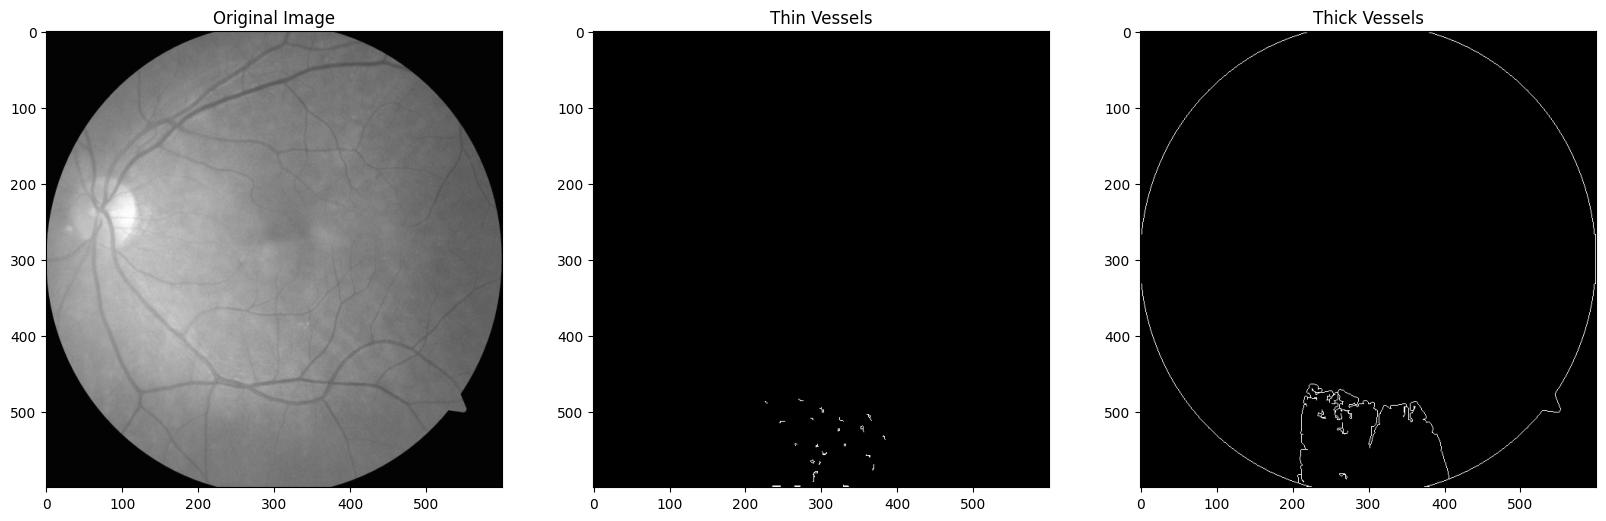

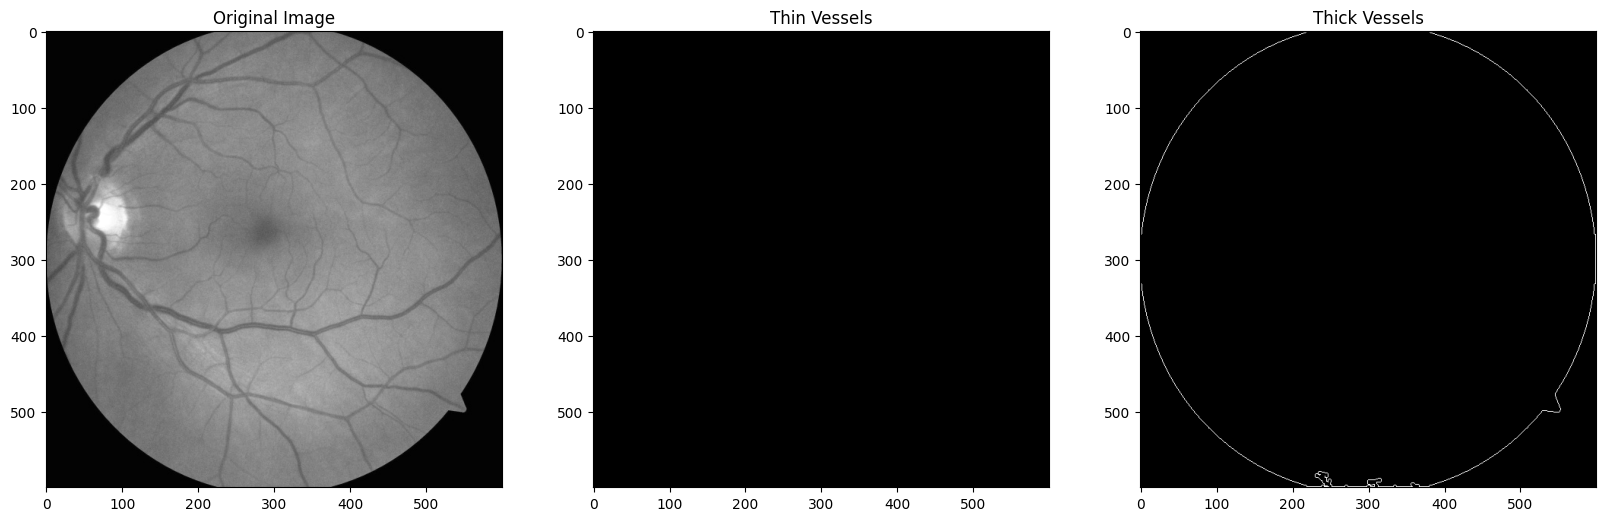

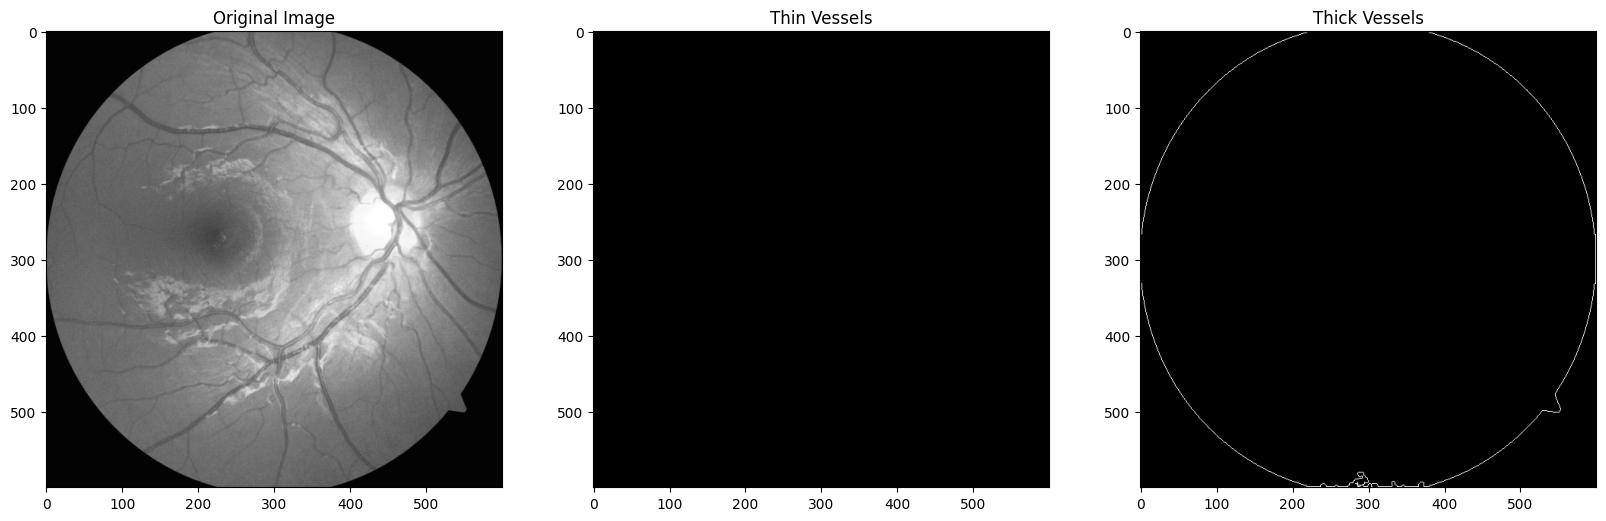

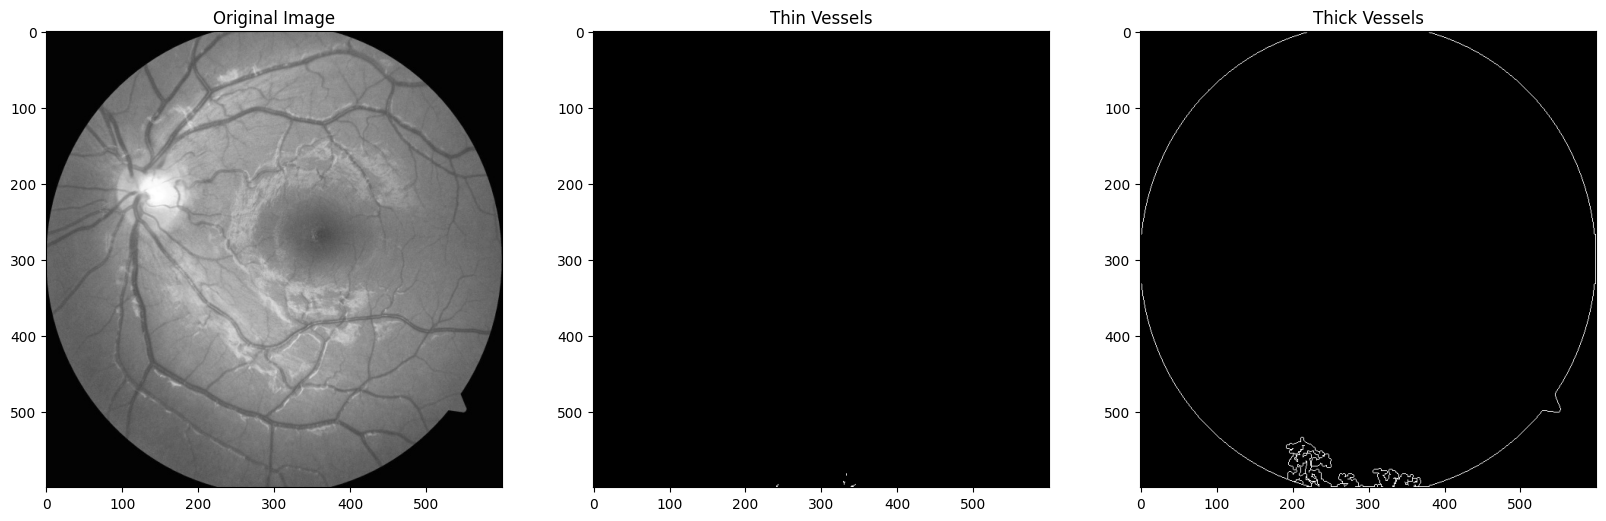

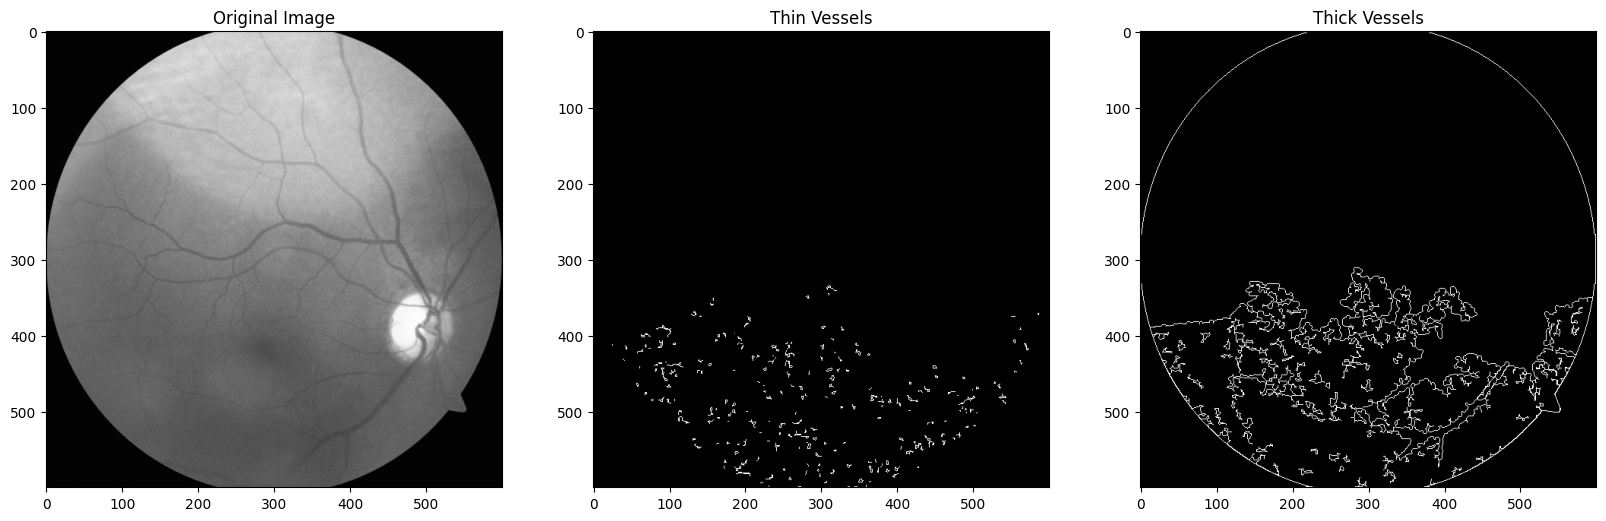

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths and their corresponding Otsu's thresholds
image_paths = [
    ('/content/drive/MyDrive/A/Train/0/1.jpg', 69.0),
    ('/content/drive/MyDrive/A/Train/0/10.jpg', 68.0),
    ('/content/drive/MyDrive/A/Train/0/100.jpg', 66.0),
    ('/content/drive/MyDrive/A/Train/0/101.jpg', 67.0),
    ('/content/drive/MyDrive/A/Train/0/102.jpg', 67.0)
]

# Define a function to process the images
def process_images(image_paths):
    # Iterate over each image path and its corresponding Otsu's threshold
    for image_path, otsu_threshold in image_paths:
        # Load the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply a Gaussian blur to the image
        blurred = cv2.GaussianBlur(img, (1, 1), 0)

        # Perform edge detection
        edges = cv2.Canny(img, 20, 40)

        # Perform a dilation and erosion to close gaps in between object edges
        dilated = cv2.dilate(edges, None, iterations=1)
        eroded = cv2.erode(dilated, None, iterations=1)

        # Create a mask for the vessels using the Otsu's threshold
        mask = eroded > otsu_threshold / 255.0  # Normalize the threshold to [0, 1]

        # Convert the mask to an 8-bit single-channel image
        mask = mask.astype(np.uint8)

        # Separate the vessels into thin and thick based on their area
        thin_vessels = np.zeros_like(img)
        thick_vessels = np.zeros_like(img)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            # If the area of the connected component is less than a threshold, it is a thin vessel
            if cv2.contourArea(contour) < 20:  # Lower threshold
                cv2.drawContours(thin_vessels, [contour], -1, (255), 1)
            else:
                cv2.drawContours(thick_vessels, [contour], -1, (255), 1)

        # Visualize the results
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')
        plt.subplot(1, 3, 2)
        plt.imshow(thin_vessels, cmap='gray')
        plt.title('Thin Vessels')
        plt.subplot(1, 3, 3)
        plt.imshow(thick_vessels, cmap='gray')
        plt.title('Thick Vessels')
        plt.show()

# Process the images
process_images(image_paths)
